# Decision Tree ML Algorithm

In [ ]:
#Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree

**Data Collection and Processing**

In [ ]:
#Load Dataset
dataset = pd.read_csv('/content/medicalDataset.csv')

In [ ]:
dataset.head()

,Sex,Age,SBP,DBP,BMI
0,Female,25.0,135.0,70.0,28.54
1,Female,20.0,129.0,95.0,NaN
2,Female,40.0,125.0,80.0,NaN
3,Female,20.0,NaN,NaN,26.63
4,Female,18.0,184.0,147.0,NaN


In [ ]:
dataset.shape

(797, 5)

In [ ]:
dataset.isnull().sum()

Sex     13
Age     80
SBP    182
DBP    183
BMI     79
dtype: int64

In [ ]:
dataset.describe()

,Age,SBP,DBP,BMI
count,717.000000,615.000000,614.000000,718.000000
mean,31.029289,124.255285,76.713355,23.477921
std,19.561120,23.291557,15.088188,46.845109
min,1.000000,80.000000,17.000000,6.990000
25%,18.000000,110.000000,68.000000,17.650538
50%,24.000000,120.000000,75.000000,20.823139
75%,45.000000,131.500000,83.000000,25.192500
max,90.000000,260.000000,182.000000,1267.595519


Using Imputation Method for Missing Data

<ipython-input-7-69df6e438fd4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'])


<Axes: xlabel='Age', ylabel='Density'>

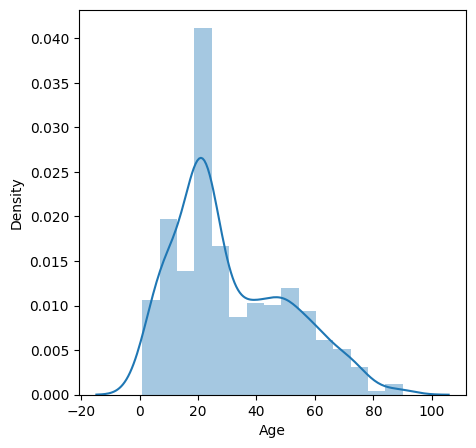

In [ ]:
#Analyse the Distribution of Age Dataset
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(dataset['Age'])

In [ ]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

<ipython-input-9-5625289aa5ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

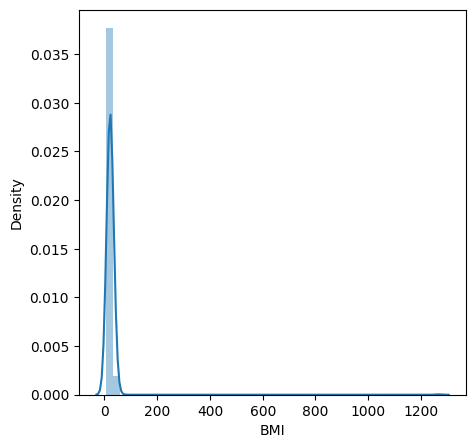

In [ ]:
# Analyse the distribution of BMI data
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(dataset['BMI'])

In [ ]:
dataset['BMI'].fillna(dataset['BMI'].mean(),inplace=True)

<ipython-input-11-f92eb6fafcb2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SBP'])


<Axes: xlabel='SBP', ylabel='Density'>

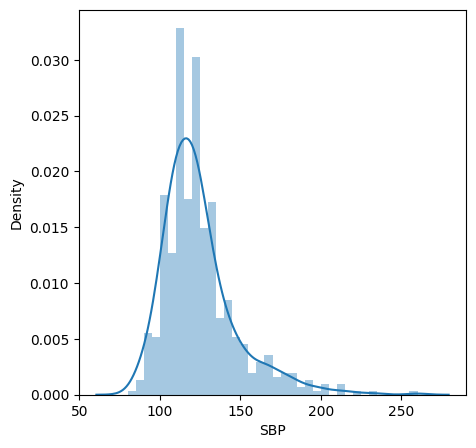

In [ ]:
# Analyse the distribution of data
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(dataset['SBP'])

In [ ]:
dataset['SBP'].fillna(dataset['SBP'].mean(),inplace=True)

<ipython-input-13-b1ef7c3d5610>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['DBP'])


<Axes: xlabel='DBP', ylabel='Density'>

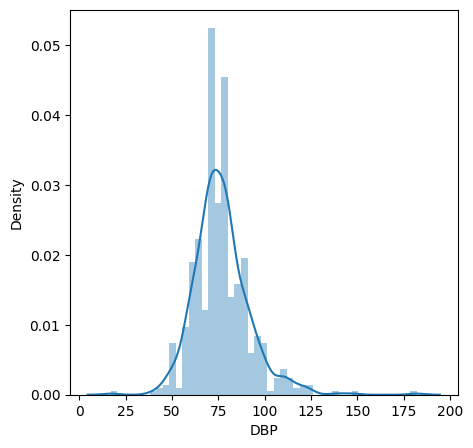

In [ ]:
# Analyse the distribution of data
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(dataset['DBP'])

In [ ]:
dataset['DBP'].fillna(dataset['DBP'].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

Sex    13
Age     0
SBP     0
DBP     0
BMI     0
dtype: int64

In [ ]:
dataset.describe()

,Age,SBP,DBP,BMI
count,797.000000,797.000000,797.000000,797.000000
mean,31.029289,124.255285,76.713355,23.477921
std,18.552126,20.456257,13.240696,44.459779
min,1.000000,80.000000,17.000000,6.990000
25%,19.000000,111.000000,70.000000,18.160000
50%,27.000000,124.255285,76.713355,21.652179
75%,43.000000,128.000000,80.000000,24.182099
max,90.000000,260.000000,182.000000,1267.595519


In [ ]:
# Create a DataFrame
df = pd.DataFrame(dataset)

# Define a function to categorize the risk based on SBP, DBP and BMI
def categorize_risk(SBP, DBP, BMI):
    if SBP < 120 and DBP < 80 and 18.5 <= BMI <= 24.9:
        return 0  # Good Health
    elif 120 <= SBP < 140 or 80 <= DBP < 90 or 19 <= BMI < 23:
        return 1  # Mild Risk of Hypertension
    elif SBP >= 140 or DBP >= 90 or BMI >= 24:
        return 2  # High Risk of Hypertension
    else:
        return 1  # Mild Risk by default

# Apply the function to create the risk_category column
df['Outcome'] = df.apply(lambda row: categorize_risk(row['SBP'], row['DBP'], row['BMI']), axis=1)

print(df)

        Sex   Age         SBP         DBP        BMI  Outcome
0    Female  25.0  135.000000   70.000000  28.540000        1
1    Female  20.0  129.000000   95.000000  23.477921        1
2    Female  40.0  125.000000   80.000000  23.477921        1
3    Female  20.0  124.255285   76.713355  26.630000        1
4    Female  18.0  184.000000  147.000000  23.477921        2
..      ...   ...         ...         ...        ...      ...
792    Male  35.0  117.000000   72.000000  18.412649        1
793  Female   1.0  124.255285   76.713355  23.477921        1
794  Female  25.0   96.000000   63.000000  16.276417        1
795  Female  30.0  113.000000   74.000000  23.533379        0
796    Male  24.0  123.000000   67.000000  19.068835        1

[797 rows x 6 columns]


In [ ]:
df.describe()

,Age,SBP,DBP,BMI,Outcome
count,797.000000,797.000000,797.000000,797.000000,797.000000
mean,31.029289,124.255285,76.713355,23.477921,0.977415
std,18.552126,20.456257,13.240696,44.459779,0.581967
min,1.000000,80.000000,17.000000,6.990000,0.000000
25%,19.000000,111.000000,70.000000,18.160000,1.000000
50%,27.000000,124.255285,76.713355,21.652179,1.000000
75%,43.000000,128.000000,80.000000,24.182099,1.000000
max,90.000000,260.000000,182.000000,1267.595519,2.000000


<ipython-input-19-a6cf9bb80c28>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Outcome'])


<Axes: xlabel='Outcome', ylabel='Density'>

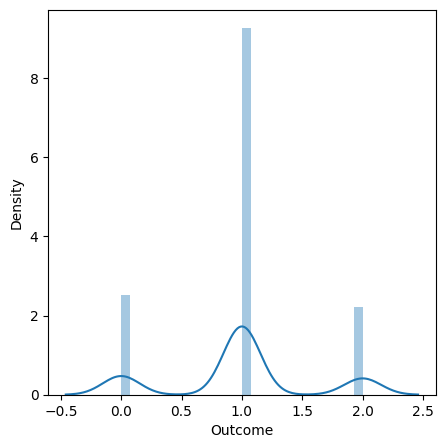

In [ ]:
# Analyse the distribution of data
fig, ax = plt.subplots(figsize=(5,5))
sns.distplot(df['Outcome'])

In [ ]:
df['Outcome'].value_counts()

Outcome
1    527
0    144
2    126
Name: count, dtype: int64

In [ ]:
#Separate Data and Label
features = dataset
target = df['Outcome']

In [ ]:
le_Sex = LabelEncoder()
features['Sex'] = le_Sex.fit_transform(features['Sex'])

In [ ]:
print(features)

     Sex   Age         SBP         DBP        BMI
0      0  25.0  135.000000   70.000000  28.540000
1      0  20.0  129.000000   95.000000  23.477921
2      0  40.0  125.000000   80.000000  23.477921
3      0  20.0  124.255285   76.713355  26.630000
4      0  18.0  184.000000  147.000000  23.477921
..   ...   ...         ...         ...        ...
792    1  35.0  117.000000   72.000000  18.412649
793    0   1.0  124.255285   76.713355  23.477921
794    0  25.0   96.000000   63.000000  16.276417
795    0  30.0  113.000000   74.000000  23.533379
796    1  24.0  123.000000   67.000000  19.068835

[797 rows x 5 columns]


In [ ]:
print(target)

0      1
1      1
2      1
3      1
4      2
      ..
792    1
793    1
794    1
795    0
796    1
Name: Outcome, Length: 797, dtype: int64


In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
model.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [ ]:
# Assuming 'features' and 'target' are your training data
accuracy = model.score(xTest, yTest)
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 98.12%


Build a Predictive System

In [ ]:
inputData = ([[1,25,135,70,28.54]])

#Change the Input Data to Numpy Array
inputDataAsNumpyArray = np.asarray(inputData)

#Reshape the Array to Predict for one Instance
inputDataReshaped = inputDataAsNumpyArray.reshape(1, -1)

#Standardize the Input Data

prediction = model.predict(inputDataReshaped)
print(prediction)

if prediction[0] == 0:
  print('Good Health')
elif prediction[0] == 1:
  print('Mild Risk of Hypertension')
elif prediction[0] == 2:
  print('High Risk of Hypertension')
else:
    print('Error! Verify Input.')

[1]
Mild Risk of Hypertension


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Saving the Trained Model

In [ ]:
import pickle
filename = 'trainedModel.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#Import the Saved Model
loadedModel = pickle.load(open('trainedModel.sav', 'rb'))

In [ ]:
inputData = ([[1,25,135,70,28.54]])

#Change the Input Data to Numpy Array
inputDataAsNumpyArray = np.asarray(inputData)

#Reshape the Array to Predict for one Instance
inputDataReshaped = inputDataAsNumpyArray.reshape(1, -1)

#Standardize the Input Data
prediction = loadedModel.predict(inputDataReshaped)
print(prediction)

if prediction[0] == 0:
  print('Good Health')
elif prediction[0] == 1:
  print('Mild Risk of Hypertension')
elif prediction[0] == 2:
  print('High Risk of Hypertension')
else:
    print('Error! Verify Input.')

[1]
Mild Risk of Hypertension


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
